# First Neural Network Classifier

In [1]:
import numpy as np
import tensorflow.keras as tf
import matplotlib.pyplot as plt
from mish import Mish
from sklearn.model_selection import train_test_split

In [18]:
X = np.load('features.npy')
y = np.load('labels.npy')
img_test = np.load('img_test.npy', allow_pickle = True)

#Step 1 : Splitting the dataset into a training set and a testing set
X_train, X_test, y_train,  y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

#Normalizing the data

X_train = tf.utils.normalize(X_train, axis = 1)
X_test = tf.utils.normalize(X_test, axis = 1)

#Step 2 : Implementation and training of the Neural Network
model = tf.models.Sequential()
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(128, activation = "Mish"))
model.add(tf.layers.Dense(2, activation = "softmax"))

#Compiling and training the model
model.compile(optimize = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) #We also could have used the Adam optimizer.


In [11]:
#Training the model
model.fit(X_train, y_train, epochs = 3)
model.summary()
#val_loss, val_accuracy = model.evaluate(X_test, y_test)

model.save('Cats_dogs')

Train on 19956 samples
Epoch 1/3
19956/19956 [==============================] - 2s 102us/sample - loss: 0.6326 - accuracy: 0.6345
Epoch 2/3
19956/19956 [==============================] - 2s 98us/sample - loss: 0.6278 - accuracy: 0.6373
Epoch 3/3
19956/19956 [==============================] - 2s 98us/sample - loss: 0.6191 - accuracy: 0.6500
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  320128    
_________________________________________________________________
dense_7 (Dense)              multiple                  16512     
_________________________________________________________________
dense_8 (Dense)              multiple                  258       
Total params: 336,898
Trainable params: 33

In [19]:
#Step 3 : Visualisation of the predictions
new_model = tf.models.load_model('Cats_dogs')
predictions = new_model.predict(X_test)

def cats_dogs(number):
    line = predictions[number]
    if np.argmax(line) == 1 : 
        print('Cat')
    else : 
        print('Dog')
    
    plt.imshow(img_test[number][0], cmap = plt.cm.gray)
    plt.show()
    
    return

Dog


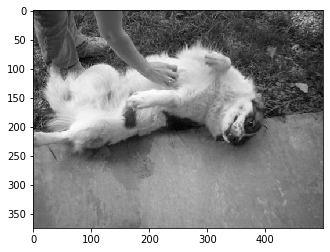

In [28]:
cats_dogs(83)